In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import pandas as pd       
training = pd.read_csv('/content/drive/MyDrive/minor project/sentiment_data.tsv',delimiter="\t")
print(training.shape)
y_train = training['sentiment']
x_train = training.drop(["sentiment"], axis=1)
                      
training.head()

(25000, 3)


,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [3]:
training.describe()

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


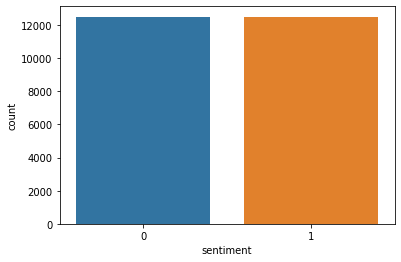

In [4]:
import seaborn as sns
sns.countplot(y_train)

import matplotlib.pyplot as plt 
import numpy as np
# Get mean of positive and negative reviews
avg_pos_reviews = training[training.Sentiment==1].Phrase.apply(lambda x: len(x.split())).mean()
avg_neg_reviews = training[training.Sentiment==0].Phrase.apply(lambda x: len(x.split())).mean()

plt.figure(figsize=(10, 3))
plt.barh(['Positive', 'Negative'], [avg_pos_reviews, avg_neg_reviews], height=0.5)
plt.xticks(np.arange(0, 300, 25))
plt.xlabel('Average Number of words')
plt.ylabel('Sentiment')
plt.show()

In [5]:
import nltk
import numpy as np
import matplotlib.pyplot as plt


In [6]:
# Import list of stopwords from library NLTK
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_list = set(stopwords.words("english"))
print(f'List of stopwords:\n{stopwords_list}\n')

# We remove negation words in list of stopwords
no_stopwords = ["not","don't",'aren','don','ain',"aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
               'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't",
               "won't", 'wouldn', "wouldn't"]
for no_stopword in no_stopwords:
    stopwords_list.remove(no_stopword)
    
#print(stopwords_list)
print(f'Final list of stopwords:\n{stopwords_list}')

List of stopwords:
{"shouldn't", "it's", "you've", "don't", 'doesn', "needn't", 'until', 'should', 'was', 'then', 'a', 'in', 'how', "shan't", 'were', 'hers', 'm', "mustn't", 'is', 'shan', 'this', 'd', 'those', 'needn', 'where', 'aren', 'here', "she's", 'above', "that'll", 'the', 'being', 'they', 'there', 'them', 'hasn', 'he', 'who', 'me', 'don', 'these', 'my', 'from', "weren't", 'ours', 'shouldn', 'on', "haven't", 't', 'am', "isn't", 'have', 'll', "hasn't", "wouldn't", 'yourselves', 'so', 'but', "hadn't", 'only', 'each', 'its', 'over', 'an', 'won', 'and', 'his', 'some', 'hadn', 'not', 'out', 'just', 'their', 'when', "you're", "couldn't", 'myself', 'you', "didn't", 'few', 'y', 'your', 'all', 'isn', 'before', 'yourself', 'other', 'under', 'whom', 'why', 'himself', 'more', 've', 'through', 'both', 'herself', 'that', 'own', 'further', 'what', 'weren', 'between', "wasn't", 'after', 'than', 'will', "doesn't", 'by', "aren't", 'down', 'because', 'are', 'any', "you'll", 'ourselves', 'has', 'doe

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
# Import Lemmatizer from NLTK
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()

# function that receive a list of words and do lemmatization:
def lemma_stem_text(words_list):
    # Lemmatizer
    text = [lemmatizer.lemmatize(token.lower()) for token in words_list]# eighties->eight or messages->message or drugs->drug
    text = [lemmatizer.lemmatize(token.lower(), "v") for token in text]# going-> go or started->start or watching->watch
    return text

word_example = "feet"
print(f'The word "{word_example}" is transformed to "{lemma_stem_text([word_example])[0]}"')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


The word "feet" is transformed to "foot"


In [8]:
import re
re_negation = re.compile("n't ")

# function that receive a sequence of woords and return the same sequence transforming
# abbreviated negations to the standard form.
def negation_abbreviated_to_standard(sent):
    sent = re_negation.sub(" not ", sent)
    return sent

word_example = "I aren't "
print(f'The sentence "{word_example}" is transformed to "{negation_abbreviated_to_standard(word_example)}"')

The sentence "I aren't " is transformed to "I are not "


In [9]:
# Import function BeautifulSoup to clean text of HTML tags
from bs4 import BeautifulSoup 

def review_to_words(raw_review):
    # 1. Remove HTML tags
    review_text = BeautifulSoup(raw_review).get_text() 
    
    # 2. Transform abbreviated negations to the standard form.
    review_text = negation_abbreviated_to_standard(review_text)
    
    # 3. Remove non-letters and non-numbers   
    letters_numbers_only = re.sub("[^a-zA-Z_0-9]", " ", review_text) 
    
    # 4. Convert to lower case and split into individual words (tokenization)
    words = np.char.lower(letters_numbers_only.split())                             
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stopwords_list]   
    
    # 6. Apply lemmatization function
    lemma_words = lemma_stem_text(meaningful_words)
    
    # 7. Join the words back into one string separated by space, and return the result.
    return( " ".join(lemma_words))   

In [10]:
# Clean first review
clean_review = review_to_words(x_train["review"][0] )

# Print original review, sentiment and cleaned review
print(f'Text of original review:\n{x_train["review"][0]}\n')
print(f'Sentiment review: {y_train[0]}\n')
print(f'Text of cleaned review:\n{clean_review}') 

Text of original review:
With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film

In [11]:
# We get the text of reviews in the training set
reviews = x_train['review']

# We initialize an empty list to add the clean reviews
cleaned_train_reviews = []

# We loop over each review and clean it  
for i in reviews:
    cleaned_train_reviews.append(review_to_words(i))

In [12]:
# Import tf-idf encoding from sklearn library
from sklearn.feature_extraction.text import TfidfVectorizer

# Define some hiperparameters of encoded
vectorizer = TfidfVectorizer(max_features=25000, ngram_range = (1,2))

# Create the training set with the words encoded as features of the reviews
train_data_features = vectorizer.fit_transform(cleaned_train_reviews)

print(train_data_features.shape)

(25000, 25000)


In [13]:
# Import the logistic regression model from sklearn 
from sklearn.linear_model import LogisticRegression

# Define the model
model = LogisticRegression(random_state=0, solver='lbfgs',
                            multi_class='multinomial')
# Train model
model.fit(train_data_features, y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

In [14]:
# Read the test data
test = pd.read_csv('/content/drive/MyDrive/minor project/sentiment_data.tsv',delimiter="\t", header=0, \
                   quoting=3 )
print(test.shape)

# Create an empty list and append the clean reviews one by one
num_reviews = len(test["review"])
clean_test_reviews = [] 

# Clean the text of all reviews in the training set
print("Cleaning and parsing the test set movie reviews...\n")
for i in range(0,num_reviews):
    clean_review = review_to_words( test["review"][i] )
    clean_test_reviews.append( clean_review )

# Create the test set with the words encoded as features of the reviews
test_data_features = vectorizer.transform(clean_test_reviews)
# Use the logistic regression model to make sentiment label predictions
result = model.predict(test_data_features)

# Copy the results to a pandas dataframe with an "id" column and a "sentiment" column
output = pd.DataFrame( data={"id":test["id"], "sentiment":result} )

(25000, 3)
Cleaning and parsing the test set movie reviews...



In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data_features, y_train, test_size=0.2, random_state=42)

In [16]:
# We train two models: random forest and logistic regression
from sklearn.ensemble import RandomForestClassifier
# Initialize a Random Forest classifier with 500 trees
forest = RandomForestClassifier(n_estimators = 500, max_depth = None, min_samples_split=2, min_samples_leaf =1,
                                bootstrap = True, random_state=0)
# Train the model
forest = forest.fit(X_train, y_train)
# Print score of model(using test dataset)
print(forest.score(X_test, y_test))

0.8682


In [17]:
y_pred=forest.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8682

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.869
Recall: 0.870
F1 Score: 0.869


In [ ]:
# Initialize a logistic regression model 
logistic = LogisticRegression(random_state=0, solver='lbfgs',
                            multi_class='multinomial')
# Train the model
logistic = logistic.fit(X_train, y_train)
# Print score of model(using test dataset)
print(logistic.score(X_test, y_test))

0.8962


In [ ]:
y_pred=forest.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.869
Recall: 0.870
F1 Score: 0.869


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier= KNeighborsClassifier(n_neighbors=4,p=2)
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
y_pred=knn_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7792

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.805
Recall: 0.742
F1 Score: 0.772


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0,criterion="entropy")
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = dt.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7132

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.715
Recall: 0.717
F1 Score: 0.716


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
 
# importing machine learning models for prediction
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
 
# importing voting classifier
from sklearn.ensemble import VotingClassifier
 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC # "Support vector classifier"  

 

In [ ]:
model_1 =  LogisticRegression(random_state=0, solver='lbfgs',
                            multi_class='multinomial')
model_2 = SVC(kernel='linear', random_state=0) 
model_3 =  RandomForestClassifier(n_estimators = 500, max_depth = None, min_samples_split=2, min_samples_leaf =1,
                                bootstrap = True, random_state=0)

In [ ]:
final_model = VotingClassifier(
    estimators=[('lr', model_1), ('svc', model_2), ('rf', model_3)], voting='hard')

In [ ]:
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100

89.84

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.891
Recall: 0.909
F1 Score: 0.900


In [ ]:
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=1)
model2 = DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(X_train,y_train)
model.score(X_test,y_test)*100

79.28

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.903
Recall: 0.659
F1 Score: 0.762


In [ ]:
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

pred1=model1.predict_proba(X_test)
pred2=model2.predict_proba(X_test)
pred3=model3.predict_proba(X_test)

finalpred=(pred1+pred2+pred3)/3


In [ ]:
print(finalpred)

[[0.85850734 0.14149266]
 [0.11746285 0.88253715]
 [0.94605676 0.05394324]
 ...
 [0.99267898 0.00732102]
 [0.9841147  0.0158853 ]
 [0.90549747 0.09450253]]


In [ ]:

from sklearn.ensemble import AdaBoostClassifier

In [ ]:
abc = AdaBoostClassifier(n_estimators=100,random_state=0)
abc.fit(X_train,y_train)


AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
y_pred = abc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8438

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.829
Recall: 0.869
F1 Score: 0.849


In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)  


SVC(kernel='linear', random_state=0)

In [ ]:
y_pred= classifier.predict(X_test)  

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8974

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.889
Recall: 0.910
F1 Score: 0.899


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

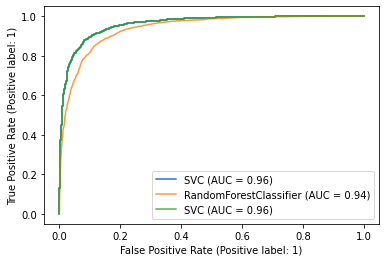

In [ ]:
svc_disp = RocCurveDisplay.from_estimator(classifier, X_test, y_test)
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(forest, X_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gradient_booster = GradientBoostingClassifier(learning_rate = 0)

In [ ]:
gradient_booster.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=5)

In [ ]:
y_pred =gradient_booster.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.592

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.557
Recall: 0.934
F1 Score: 0.698


In [ ]:
import xgboost as xgb
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8214

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.790
Recall: 0.880
F1 Score: 0.832


In [ ]:
from sklearn.ensemble import VotingClassifier
model1 = SVC(kernel='linear', random_state=0)  
model2 = KNeighborsClassifier()
model = VotingClassifier(estimators=[('sv', model1), ('knn', model2)], voting='hard')
model.fit(X_train,y_train)
model.score(X_test,y_test)*100

86.2